## Let's clean some data

### import relevant libraries

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

### Loading the data

In [4]:
data = pd.read_excel('output.xlsx', sheet_name='Sheet1')
data.head()

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",66% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [5]:
data.describe(include='all')

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
count,30000.000000,30000,29137,27554.000000,27932,30000,30000,29059,18017,30000,30000,30000,30000,28259,29998,30000,30000,30000
unique,NaN,30000,728,NaN,324,4,17188,87,5192,24146,2,28080,26783,534,1512,24,4579,30000
top,NaN,51004dc4-4209-5986-b113-cd010479c59b,999,NaN,ARBO,Clothing and Accessories,"02/11/2021, 01:31:26",60% off,Refresh your clothing with this latest new Pri...,[],False,TSHFUHWA7E7JKKUY,"[{'Color': 'Black'}, {'Care instructions': 'Du...",RetailNet,399,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/okane-striped-men-rou...
freq,NaN,1,3671,NaN,999,28971,3,2335,377,778,28258,25,112,1615,1571,16575,856,1
mean,14999.500000,NaN,NaN,3.641972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8660.398374,NaN,NaN,0.664232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7499.750000,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14999.500000,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22499.250000,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dealing with the missing values

In [15]:
data.describe(include='all')
data.isnull().sum()


_id                  0
actual_price       863
category             0
crawled_at           0
description        941
images               0
out_of_stock         0
pid                  0
product_details      0
selling_price        2
sub_category         0
title                0
url                  0
dtype: int64

In [18]:
data_with_no_mv = data.dropna(axis=0, inplace=True)
data.describe(include='all')

,_id,actual_price,category,crawled_at,description,images,out_of_stock,pid,product_details,selling_price,sub_category,title,url
count,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059
unique,29059,723,4,16838,87,23433,2,27225,25934,1472,24,4489,29059
top,a5396fab-753c-5cd7-bad9-050964f95a0f,999,Clothing and Accessories,"02/10/2021, 20:12:10",60% off,[],False,TSHFYZH5F2EDHEAW,"[{'Color': 'Black'}, {'Care instructions': 'Du...",399,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/okane-full-sleeve-sol...
freq,1,3663,28048,3,2335,764,27394,25,112,1567,16153,827,1


In [19]:
data.columns

Index(['_id', 'actual_price', 'category', 'crawled_at', 'description',
       'images', 'out_of_stock', 'pid', 'product_details', 'selling_price',
       'sub_category', 'title', 'url'],
      dtype='object')

In [22]:
data.describe()
data.drop(columns=['_id'], inplace=True)

In [23]:
data.describe()

,actual_price,category,crawled_at,description,images,out_of_stock,pid,product_details,selling_price,sub_category,title,url
count,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059,29059
unique,723,4,16838,87,23433,2,27225,25934,1472,24,4489,29059
top,999,Clothing and Accessories,"02/10/2021, 20:12:10",60% off,[],False,TSHFYZH5F2EDHEAW,"[{'Color': 'Black'}, {'Care instructions': 'Du...",399,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/okane-full-sleeve-sol...
freq,3663,28048,3,2335,764,27394,25,112,1567,16153,827,1


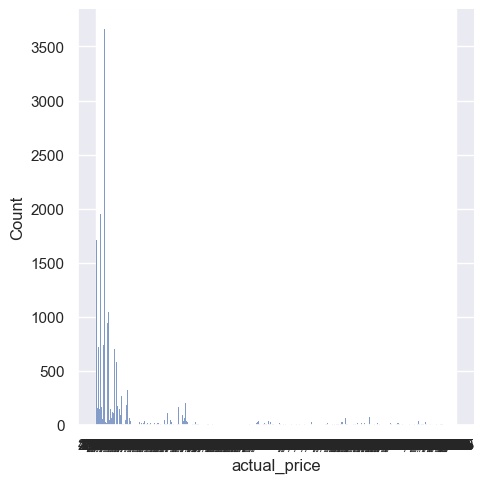

In [25]:
sns.displot(data['actual_price'])

In [27]:
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')
q = data['actual_price'].quantile(0.99)
data_1 = data[data['actual_price']<q]
data_1.describe(include='all')

,actual_price,category,crawled_at,description,images,out_of_stock,pid,product_details,selling_price,sub_category,title,url
count,8886.000000,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886
unique,NaN,4,6031,80,6965,2,8409,7744,483,16,1530,8886
top,NaN,Clothing and Accessories,"02/11/2021, 01:22:16",63% off,[],False,TSHFVHYZHXCHRCMN,"[{'Color': 'Black'}, {'Care instructions': 'Du...",299,Topwear,Slides,https://www.flipkart.com/okane-printed-men-blu...
freq,NaN,8187,3,576,296,8669,25,112,756,5743,556,1
mean,709.647310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,163.567646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,599.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,699.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,849.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


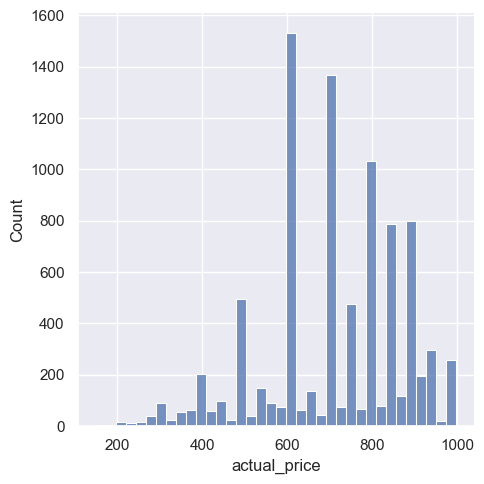

In [28]:
sns.displot(data_1['actual_price'])

In [31]:
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')
q = data['selling_price'].quantile(0.99)
data_1 = data[data['selling_price']<q]
data_1.describe(include='all')

,actual_price,category,crawled_at,description,images,out_of_stock,pid,product_details,selling_price,sub_category,title,url
count,12549.000000,24161,24161,24161,24161,24161,24161,24161,24161.000000,24161,24161,24161
unique,NaN,4,14760,87,19416,2,22758,21675,NaN,24,3904,24161
top,NaN,Clothing and Accessories,"02/10/2021, 20:12:28",60% off,[],False,TSHFVHYZHXCHRCMN,"[{'Color': 'Black'}, {'Care instructions': 'Du...",NaN,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/okane-printed-men-blu...
freq,NaN,23227,3,1730,751,23014,25,112,NaN,14752,789,1
mean,794.108136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.988908,NaN,NaN,NaN
std,190.396898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.580462,NaN,NaN,NaN
min,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN
25%,641.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.000000,NaN,NaN,NaN
50%,799.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495.000000,NaN,NaN,NaN
75%,999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679.000000,NaN,NaN,NaN


<Axes: xlabel='selling_price', ylabel='Count'>

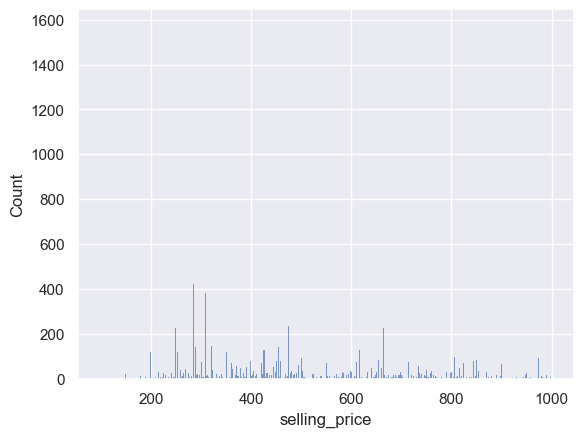

In [40]:
sns.histplot(data['selling_price'], discrete=True)


C:\Users\omuya\AppData\Local\Temp\ipykernel_5760\824799782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

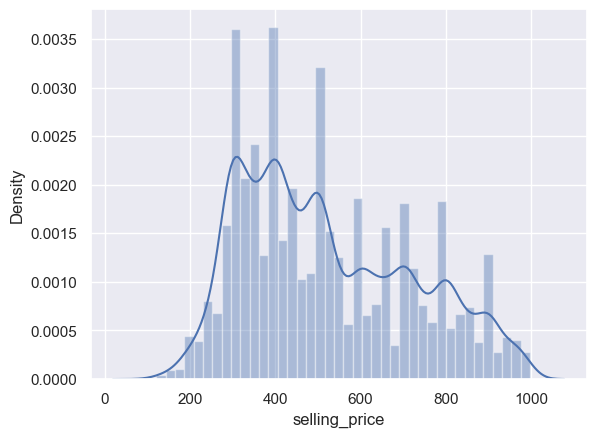

In [39]:
sns.distplot(data_1['selling_price'])

In [41]:
data_1.describe(include='all')

,actual_price,category,crawled_at,description,images,out_of_stock,pid,product_details,selling_price,sub_category,title,url
count,12549.000000,24161,24161,24161,24161,24161,24161,24161,24161.000000,24161,24161,24161
unique,NaN,4,14760,87,19416,2,22758,21675,NaN,24,3904,24161
top,NaN,Clothing and Accessories,"02/10/2021, 20:12:28",60% off,[],False,TSHFVHYZHXCHRCMN,"[{'Color': 'Black'}, {'Care instructions': 'Du...",NaN,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/okane-printed-men-blu...
freq,NaN,23227,3,1730,751,23014,25,112,NaN,14752,789,1
mean,794.108136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.988908,NaN,NaN,NaN
std,190.396898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.580462,NaN,NaN,NaN
min,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN
25%,641.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.000000,NaN,NaN,NaN
50%,799.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495.000000,NaN,NaN,NaN
75%,999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679.000000,NaN,NaN,NaN
